# 4.8 시계열 자료 다루기

```{margin}
`DatetimeIndex`
```

In [3]:
from datetime import datetime

In [4]:
dt = datetime(2024, 9, 23, 9, 15, 45)
dt

datetime.datetime(2024, 9, 23, 9, 15, 45)

In [5]:
print(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)

2024 9 23 9 15 45


In [6]:
cur = datetime.now()
cur

datetime.datetime(2024, 9, 23, 9, 17, 14, 319180)

## `DatetimeIndex` 인덱스

시계열 자료는 인덱스가 날짜 혹은 시간인 데이터를 말한다.   
판다스에서 시계열 자료를 생성하려면 인덱스를 `DatetimeIndex` 자료형으로 만들어야 한다.   
`DatetimeIndex`는 특정한 순간에 기록된 타임스탬프(timestamp) 형식의 시계열 자료를 다루기 위한 인덱스이다.   
타임스탬프 인덱스의 라벨값이 반드시 일정한 간격일 필요는 없다.

`DatetimeIndex` 인덱스는 다음과 같은 보조 함수를 사용하여 생성한다.

* `pd.to_datetime` 함수
* `pd.date_range` 함수

```{margin}
to_datetime
```

`pd.to_datetime` 함수를 쓰면 날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후 `DatetimeIndex` 자료형 인덱스를 생성한다.
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [7]:
import pandas as pd

In [8]:
# format 생략해도 자동으로 잡히긴하지만 포맷을 지정하는게 좋음
date_str = ["2024, 9, 1", "2024, 9, 4", "2024, 9, 5", "2024, 9, 6"]
print(type(date_str[0]))
idx = pd.to_datetime(date_str) 
idx

<class 'str'>


DatetimeIndex(['2024-09-01', '2024-09-04', '2024-09-05', '2024-09-06'], dtype='datetime64[ns]', freq=None)

이렇게 만들어진 인덱스를 사용하여 시리즈나 데이터프레임을 생성하면 된다.

In [9]:
import numpy as np

In [10]:
np.random.seed(0)
s = pd.Series(np.random.randn(4), index=idx)
s

2024-09-01    1.764052
2024-09-04    0.400157
2024-09-05    0.978738
2024-09-06    2.240893
dtype: float64

In [11]:
s.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4 entries, 2024-09-01 to 2024-09-06
Series name: None
Non-Null Count  Dtype  
--------------  -----  
4 non-null      float64
dtypes: float64(1)
memory usage: 64.0 bytes


In [19]:
data ={'2024년9월19일':[10,20,30],
       '2024년9월20일':[40,50,60],
       '2024년9월21일':[70,80,90],
       '2024년9월22일':[100,120,130]}

In [20]:
df = pd.DataFrame(data)
df 

,2024년9월19일,2024년9월20일,2024년9월21일,2024년9월22일
0,10,40,70,100
1,20,50,80,120
2,30,60,90,130


In [21]:
df = df.T
df

,0,1,2
2024년9월19일,10,20,30
2024년9월20일,40,50,60
2024년9월21일,70,80,90
2024년9월22일,100,120,130


In [22]:
# object형은 시계열 데이터 아님
df.index, type(df.index[0])

(Index(['2024년9월19일', '2024년9월20일', '2024년9월21일', '2024년9월22일'], dtype='object'),
 str)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 2024년9월19일 to 2024년9월22일
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4 non-null      int64
 1   1       4 non-null      int64
 2   2       4 non-null      int64
dtypes: int64(3)
memory usage: 300.0+ bytes


In [24]:
pd.to_datetime?

Signature:
pd.to_datetime(
    arg: 'DatetimeScalarOrArrayConvertible | DictConvertible',
    errors: 'DateTimeErrorChoices' = 'raise',
    dayfirst: 'bool' = False,
    yearfirst: 'bool' = False,
    utc: 'bool' = False,
    format: 'str | None' = None,
    exact: 'bool | lib.NoDefault' = <no_default>,
    unit: 'str | None' = None,
    infer_datetime_format: 'lib.NoDefault | bool' = <no_default>,
    origin: 'str' = 'unix',
    cache: 'bool' = True,
) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
Docstring:
Convert argument to datetime.

This function converts a scalar, array-like, :class:`Series` or
:class:`DataFrame`/dict-like to a pandas datetime object.

Parameters
----------
arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
    The object to convert to a datetime. If a :class:`DataFrame` is provided, the
    method expects minimally the following columns: :const:`"year"`,
    :const:`"month"`, :const:`"day"`. The column "year"
 

In [27]:
# 인덱스만 date타입으로 변경 
df.index  = pd.to_datetime(df.index, format='%Y년%m월%d일')  
# df.index  = pd.to_datetime(df.index, format='mixed') # 가능하긴 한데 권장안함
df.index

DatetimeIndex(['2024-09-19', '2024-09-20', '2024-09-21', '2024-09-22'], dtype='datetime64[ns]', freq=None)

```{margin}
date_range
```

`pd.date_range` 함수를 쓰면 모든 날짜/시간을 일일히 입력할 필요없이 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성해 준다.

In [15]:
pd.date_range?

Signature:
pd.date_range(
    start=None,
    end=None,
    periods=None,
    freq=None,
    tz=None,
    normalize: 'bool' = False,
    name: 'Hashable' = None,
    closed: "Literal['left', 'right'] | None | lib.NoDefault" = <no_default>,
    inclusive: 'IntervalClosedType | None' = None,
    **kwargs,
) -> 'DatetimeIndex'
Docstring:
Return a fixed frequency DatetimeIndex.

Returns the range of equally spaced time points (where the difference between any
two adjacent points is specified by the given frequency) such that they all
satisfy `start <[=] x <[=] end`, where the first one and the last one are, resp.,
the first and last time points in that range that fall on the boundary of ``freq``
(if given as a frequency string) or that are valid for ``freq`` (if given as a
:class:`pandas.tseries.offsets.DateOffset`). (If exactly one of ``start``,
``end``, or ``freq`` is *not* specified, this missing parameter can be computed
given ``periods``, the number of timesteps in the range. See the 

In [28]:
pd.date_range("2024-9-1", "2024-9-30")

DatetimeIndex(['2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04',
               '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-08',
               '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12',
               '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16',
               '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20',
               '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24',
               '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-28',
               '2024-09-29', '2024-09-30'],
              dtype='datetime64[ns]', freq='D')

In [29]:
pd.date_range("2024-9-1", "2024-12-31")

DatetimeIndex(['2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04',
               '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-08',
               '2024-09-09', '2024-09-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=122, freq='D')

In [30]:
pd.date_range(start="2024-9-1", periods=40)

DatetimeIndex(['2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04',
               '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-08',
               '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12',
               '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16',
               '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20',
               '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24',
               '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-28',
               '2024-09-29', '2024-09-30', '2024-10-01', '2024-10-02',
               '2024-10-03', '2024-10-04', '2024-10-05', '2024-10-06',
               '2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10'],
              dtype='datetime64[ns]', freq='D')

`freq` 인수로 특정한 날짜만 생성되도록 할 수도 있다. 많이 사용되는 `freq` 인수값은 다음과 같다.

* `s`: 초
* `T`: 분
* `H`: 시간
* `D`: 일(day)
* `B`: 주말이 아닌 평일
* `W`: 주(일요일)
* `W-MON`: 주(월요일)
* `M`: 각 달(month)의 마지막 날
* `MS`: 각 달의 첫날
* `BM`: 주말이 아닌 평일 중에서 각 달의 마지막 날
* `BMS`: 주말이 아닌 평일 중에서 각 달의 첫날
* `WOM-2THU`: 각 달의 두번째 목요일
* `Q-JAN`: 각 분기의 첫달의 마지막 날
* `Q-DEC`: 각 분기의 마지막 달의 마지막 날

보다 자세한 내용은 다음 웹사이트를 참조한다.

* [https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [31]:
pd.date_range("2024-09-1", "2024-12-31", freq="B")

DatetimeIndex(['2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05',
               '2024-09-06', '2024-09-09', '2024-09-10', '2024-09-11',
               '2024-09-12', '2024-09-13', '2024-09-16', '2024-09-17',
               '2024-09-18', '2024-09-19', '2024-09-20', '2024-09-23',
               '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27',
               '2024-09-30', '2024-10-01', '2024-10-02', '2024-10-03',
               '2024-10-04', '2024-10-07', '2024-10-08', '2024-10-09',
               '2024-10-10', '2024-10-11', '2024-10-14', '2024-10-15',
               '2024-10-16', '2024-10-17', '2024-10-18', '2024-10-21',
               '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08', '2024-11-11', '2024-11-12',
               '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-18',
      

In [33]:
pd.date_range("2024-9-1", "2024-9-30", freq="W")

DatetimeIndex(['2024-09-01', '2024-09-08', '2024-09-15', '2024-09-22',
               '2024-09-29'],
              dtype='datetime64[ns]', freq='W-SUN')

## `shift` 연산

시계열 데이터의 인덱스는 시간이나 날짜를 나타내기 때문에 날짜 이동 등의 다양한 연산이 가능하다.   
예를 들어 `shift` 연산을 사용하면 인덱스는 그대로 두고 데이터만 이동할 수도 있다.

In [38]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range(
    "2024-9-1", periods=4, freq="M"))
ts

C:\Users\com\AppData\Local\Temp\ipykernel_1888\3057718656.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = pd.Series(np.random.randn(4), index=pd.date_range(


2024-09-30    1.764052
2024-10-31    0.400157
2024-11-30    0.978738
2024-12-31    2.240893
Freq: ME, dtype: float64

In [39]:
ts.shift(1)

2024-09-30         NaN
2024-10-31    1.764052
2024-11-30    0.400157
2024-12-31    0.978738
Freq: ME, dtype: float64

In [40]:
ts.shift(-1)

2024-09-30    0.400157
2024-10-31    0.978738
2024-11-30    2.240893
2024-12-31         NaN
Freq: ME, dtype: float64

In [41]:
ts.shift?

Signature:
ts.shift(
    periods: 'int | Sequence[int]' = 1,
    freq=None,
    axis: 'Axis' = 0,
    fill_value: 'Hashable' = <no_default>,
    suffix: 'str | None' = None,
) -> 'Self | DataFrame'
Docstring:
Shift index by desired number of periods with an optional time `freq`.

When `freq` is not passed, shift the index without realigning the data.
If `freq` is passed (in this case, the index must be date or datetime,
or it will raise a `NotImplementedError`), the index will be
increased using the periods and the `freq`. `freq` can be inferred
when specified as "infer" as long as either freq or inferred_freq
attribute is set in the index.

Parameters
----------
periods : int or Sequence
    Number of periods to shift. Can be positive or negative.
    If an iterable of ints, the data will be shifted once by each int.
    This is equivalent to shifting by one value at a time and
    concatenating all resulting frames. The resulting columns will have
    the shift suffixed to their colu

In [31]:
ts.shift(1, freq="M")

2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: M, dtype: float64

In [42]:
ts.shift(1, freq="W")

2024-10-06    1.764052
2024-11-03    0.400157
2024-12-01    0.978738
2025-01-05    2.240893
dtype: float64

## `resample` 연산

`resample` 연산을 쓰면 시간 간격을 재조정하는 리샘플링(resampling)이 가능하다.    
이 때 시간 구간이 작아지면 데이터 양이 증가한다고 해서 업-샘플링(up-sampling)이라 하고    
시간 구간이 커지면 데이터 양이 감소한다고 해서 다운-샘플링(down-sampling)이라 부른다.

In [43]:
ts = pd.Series(np.random.randn(100), index=pd.date_range("2024-9-1", periods=100, freq="D"))
ts.tail(20)

2024-11-20    1.488252
2024-11-21    1.895889
2024-11-22    1.178780
2024-11-23   -0.179925
2024-11-24   -1.070753
2024-11-25    1.054452
2024-11-26   -0.403177
2024-11-27    1.222445
2024-11-28    0.208275
2024-11-29    0.976639
2024-11-30    0.356366
2024-12-01    0.706573
2024-12-02    0.010500
2024-12-03    1.785870
2024-12-04    0.126912
2024-12-05    0.401989
2024-12-06    1.883151
2024-12-07   -1.347759
2024-12-08   -1.270485
2024-12-09    0.969397
Freq: D, dtype: float64

다운-샘플링의 경우에는 원래의 데이터가 그룹으로 묶이기 때문에 그룹바이(groupby)때와 같이 그룹 연산을 해서 대표값을 구해야 한다.

In [44]:
ts.resample('W')

In [45]:
ts.resample('W').mean()

2024-09-01    1.867558
2024-09-08    0.246736
2024-09-15    0.466034
2024-09-22   -0.259401
2024-09-29    0.358005
2024-10-06   -0.061331
2024-10-13   -0.632084
2024-10-20   -0.464164
2024-10-27   -0.128626
2024-11-03   -0.612965
2024-11-10    0.044234
2024-11-17   -0.379167
2024-11-24    0.320237
2024-12-01    0.588796
2024-12-08    0.227168
2024-12-15    0.969397
Freq: W-SUN, dtype: float64

In [46]:
ts.resample('M').first()

C:\Users\com\AppData\Local\Temp\ipykernel_1888\1581405763.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample('M').first()


2024-09-30    1.867558
2024-10-31   -0.347912
2024-11-30   -0.401781
2024-12-31    0.706573
Freq: ME, dtype: float64

날짜가 아닌 시/분 단위에서는 구간위 왼쪽 한계값(가장 빠른 값)은 포함하고   
오른쪽 한계값(가장 늦은 값)은 포함하지 않는다.   
즉, 가장 늦은 값은 다음 구간에 포함된다. 예를 들어 10분 간격으로 구간을 만들면 10의 배수가 되는 시각은 구간의 시작점이 된다.

In [47]:
ts = pd.Series(np.random.randn(60), index=pd.date_range(
    "2018-1-1", periods=60, freq="T"))
ts.head(20)

C:\Users\com\AppData\Local\Temp\ipykernel_1888\1446839026.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts = pd.Series(np.random.randn(60), index=pd.date_range(


2018-01-01 00:00:00   -1.173123
2018-01-01 00:01:00    1.943621
2018-01-01 00:02:00   -0.413619
2018-01-01 00:03:00   -0.747455
2018-01-01 00:04:00    1.922942
2018-01-01 00:05:00    1.480515
2018-01-01 00:06:00    1.867559
2018-01-01 00:07:00    0.906045
2018-01-01 00:08:00   -0.861226
2018-01-01 00:09:00    1.910065
2018-01-01 00:10:00   -0.268003
2018-01-01 00:11:00    0.802456
2018-01-01 00:12:00    0.947252
2018-01-01 00:13:00   -0.155010
2018-01-01 00:14:00    0.614079
2018-01-01 00:15:00    0.922207
2018-01-01 00:16:00    0.376426
2018-01-01 00:17:00   -1.099401
2018-01-01 00:18:00    0.298238
2018-01-01 00:19:00    1.326386
Freq: min, dtype: float64

In [48]:
ts.resample('10T').sum()

C:\Users\com\AppData\Local\Temp\ipykernel_1888\4170577731.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.resample('10T').sum()


2018-01-01 00:00:00    6.835324
2018-01-01 00:10:00    3.764630
2018-01-01 00:20:00    0.776495
2018-01-01 00:30:00   -0.538336
2018-01-01 00:40:00    1.828234
2018-01-01 00:50:00    0.167957
Freq: 10min, dtype: float64

왼쪽이 아니라 오른쪽 한계값을 구간에 포함하려면 `closed="right"` 인수를 사용한다. 이 때는 10의 배수가 되는 시각이 앞 구간에 포함된다.

In [49]:
ts.resample('10T', closed="right").sum()

C:\Users\com\AppData\Local\Temp\ipykernel_1888\1782025602.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.resample('10T', closed="right").sum()


2017-12-31 23:50:00   -1.173123
2018-01-01 00:00:00    7.740444
2018-01-01 00:10:00    3.338065
2018-01-01 00:20:00    0.835217
2018-01-01 00:30:00    2.480654
2018-01-01 00:40:00   -0.653363
2018-01-01 00:50:00    0.266409
Freq: 10min, dtype: float64

`ohlc` 메서드는 구간의 시고저종(open, high, low, close)값을 구한다.

In [50]:
ts.resample('5T').ohlc()

C:\Users\com\AppData\Local\Temp\ipykernel_1888\1835478426.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.resample('5T').ohlc()


,open,high,low,close
2018-01-01 00:00:00,-1.173123,1.943621,-1.173123,1.922942
2018-01-01 00:05:00,1.480515,1.910065,-0.861226,1.910065
2018-01-01 00:10:00,-0.268003,0.947252,-0.268003,0.614079
2018-01-01 00:15:00,0.922207,1.326386,-1.099401,1.326386
2018-01-01 00:20:00,-0.694568,1.849264,-0.694568,0.672295
2018-01-01 00:25:00,0.407462,0.539249,-0.769916,0.031831
2018-01-01 00:30:00,-0.635846,0.676433,-0.635846,0.396007
2018-01-01 00:35:00,-1.093062,0.635031,-1.491258,0.635031
2018-01-01 00:40:00,2.383145,2.383145,-1.315907,-1.315907
2018-01-01 00:45:00,-0.461585,1.713343,-0.826439,-0.826439


In [42]:
ts.resample('5T', closed='right').ohlc()

,open,high,low,close
2017-12-31 23:55:00,-1.173123,-1.173123,-1.173123,-1.173123
2018-01-01 00:00:00,1.943621,1.943621,-0.747455,1.480515
2018-01-01 00:05:00,1.867559,1.910065,-0.861226,-0.268003
2018-01-01 00:10:00,0.802456,0.947252,-0.155010,0.922207
2018-01-01 00:15:00,0.376426,1.326386,-1.099401,-0.694568
2018-01-01 00:20:00,-0.149635,1.849264,-0.435154,0.407462
2018-01-01 00:25:00,-0.769916,0.539249,-0.769916,-0.635846
2018-01-01 00:30:00,0.676433,0.676433,-1.093062,-1.093062
2018-01-01 00:35:00,-1.491258,2.383145,-1.491258,2.383145
2018-01-01 00:40:00,0.944479,1.117016,-1.315907,-0.461585


업-샘플링의 경우에는 실제로 존재하지 않는 데이터를 만들어야 한다.    
이 때는 앞에서 나온 데이터를 뒤에서 그대로 쓰는 forward filling 방식과    
뒤에서 나올 데이터를 앞에서 미리 쓰는 backward filling 방식을 사용할 수 있다.   
각각 `ffill`, `bfill` 메서드를 이용한다.

In [51]:
ts.resample('30s').ffill().head(20)

2018-01-01 00:00:00   -1.173123
2018-01-01 00:00:30   -1.173123
2018-01-01 00:01:00    1.943621
2018-01-01 00:01:30    1.943621
2018-01-01 00:02:00   -0.413619
2018-01-01 00:02:30   -0.413619
2018-01-01 00:03:00   -0.747455
2018-01-01 00:03:30   -0.747455
2018-01-01 00:04:00    1.922942
2018-01-01 00:04:30    1.922942
2018-01-01 00:05:00    1.480515
2018-01-01 00:05:30    1.480515
2018-01-01 00:06:00    1.867559
2018-01-01 00:06:30    1.867559
2018-01-01 00:07:00    0.906045
2018-01-01 00:07:30    0.906045
2018-01-01 00:08:00   -0.861226
2018-01-01 00:08:30   -0.861226
2018-01-01 00:09:00    1.910065
2018-01-01 00:09:30    1.910065
Freq: 30s, dtype: float64

In [52]:
ts.resample('30s').bfill().head(20)

2018-01-01 00:00:00   -1.173123
2018-01-01 00:00:30    1.943621
2018-01-01 00:01:00    1.943621
2018-01-01 00:01:30   -0.413619
2018-01-01 00:02:00   -0.413619
2018-01-01 00:02:30   -0.747455
2018-01-01 00:03:00   -0.747455
2018-01-01 00:03:30    1.922942
2018-01-01 00:04:00    1.922942
2018-01-01 00:04:30    1.480515
2018-01-01 00:05:00    1.480515
2018-01-01 00:05:30    1.867559
2018-01-01 00:06:00    1.867559
2018-01-01 00:06:30    0.906045
2018-01-01 00:07:00    0.906045
2018-01-01 00:07:30   -0.861226
2018-01-01 00:08:00   -0.861226
2018-01-01 00:08:30    1.910065
2018-01-01 00:09:00    1.910065
2018-01-01 00:09:30   -0.268003
Freq: 30s, dtype: float64

## `dt` 접근자

datetime 자료형 시리즈에는 dt 접근자가 있어 datetime 자료형이 가진 몇가지 유용한 속성과 메서드를 사용할 수 있다.

In [53]:
s = pd.Series(pd.date_range("2020-12-25", periods=100, freq="D"))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

예를 들어 `year`, `month`, `day`, `weekday` 등의 속성을 이용하면 년, 월, 일, 요일 정보를 빼낼 수 있다.

In [54]:
s.dt

In [55]:
s.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int32

In [56]:
s.dt.weekday

0     4
1     5
2     6
3     0
4     1
     ..
95    1
96    2
97    3
98    4
99    5
Length: 100, dtype: int32

`strftime` 메서드를 이용하여 문자열을 만드는 것도 가능하다.

In [57]:
s.dt.strftime("%Y년 %m월 %d일")

0     2020년 12월 25일
1     2020년 12월 26일
2     2020년 12월 27일
3     2020년 12월 28일
4     2020년 12월 29일
          ...      
95    2021년 03월 30일
96    2021년 03월 31일
97    2021년 04월 01일
98    2021년 04월 02일
99    2021년 04월 03일
Length: 100, dtype: object

## 연습문제
````

다음 명령으로 만들어진 데이터프레임에 대해 월별 value의 합계를 구하라.
(힌트: `groupby` 메서드와 `dt` 접근자를 사용하라)

```
np.random.seed(0)
df = pd.DataFrame({
    "date": pd.date_range("2024-9-1", periods=100, freq="D"), 
    "value": np.random.randint(100, size=(100,))
})
```
````

In [66]:
import pandas as pd
import numpy as np

In [67]:
np.random.seed(0)
df = pd.DataFrame({
    "date": pd.date_range("2024-9-1", periods=100, freq="D"), 
    "value": np.random.randint(100, size=(100,))
})
df

,date,value
0,2024-09-01,44
1,2024-09-02,47
2,2024-09-03,64
3,2024-09-04,67
4,2024-09-05,67
...,...,...
95,2024-12-05,23
96,2024-12-06,79
97,2024-12-07,13
98,2024-12-08,85


In [60]:
df['month']=df['date'].dt.month
df

,date,value,month
0,2024-09-01,44,9
1,2024-09-02,47,9
2,2024-09-03,64,9
3,2024-09-04,67,9
4,2024-09-05,67,9
...,...,...,...
95,2024-12-05,23,12
96,2024-12-06,79,12
97,2024-12-07,13,12
98,2024-12-08,85,12


In [61]:
df.groupby('month')['value'].sum()

month
9     1715
10    1248
11    1420
12     440
Name: value, dtype: int32

In [68]:
# datetime index로도 풀어보자
np.random.seed(0)
df = pd.DataFrame({
    "date": pd.date_range("2024-9-1", periods=100, freq="D"), 
    "value": np.random.randint(100, size=(100,))})
df = df.set_index('date')
df

,value
date,
2024-09-01,44
2024-09-02,47
2024-09-03,64
2024-09-04,67
2024-09-05,67
...,...
2024-12-05,23
2024-12-06,79
2024-12-07,13


In [69]:
df.resample('M').sum()

C:\Users\com\AppData\Local\Temp\ipykernel_1888\3731312487.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').sum()


,value
date,
2024-09-30,1715
2024-10-31,1248
2024-11-30,1420
2024-12-31,440


# 주식 데이터로 연습하기
* !pip install pandas_datareader
* !pip install yfinance
* https://pypi.org/project/yfinance/
* https://sine-qua-none.tistory.com/75
- 각종 금융정보를 dataframe으로 제공하는 라이브러리

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# 한글 및 특정 문자 깨짐 문제 해결
# import koreanize_matplotlib # 시본의 한글 깨짐은 해결못하지만 - 깨짐 해결
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [6]:
import yfinance as yfin

In [8]:
# 삼성전자 주가 읽어오기(종목코드, start, end)
# Ticker객체는 DF변환 불가
sdf = yfin.Ticker('005930.KS') # 삼성전자 KOSPI 지수, 끝을 생략하는 오늘까지 가져옴
sdf

yfinance.Ticker object <005930.KS>

In [10]:
sdf.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-26 00:00:00+09:00,78100.0,78200.0,76000.0,76100.0,15655938,0.0,0.0
2024-08-27 00:00:00+09:00,75700.0,76500.0,75600.0,75800.0,11130145,0.0,0.0
2024-08-28 00:00:00+09:00,75800.0,76400.0,75400.0,76400.0,9794514,0.0,0.0
2024-08-29 00:00:00+09:00,73600.0,74700.0,73500.0,74000.0,16884479,0.0,0.0
2024-08-30 00:00:00+09:00,74400.0,75000.0,74100.0,74300.0,16358520,0.0,0.0
2024-09-02 00:00:00+09:00,74500.0,74700.0,73500.0,74400.0,12641376,0.0,0.0
2024-09-03 00:00:00+09:00,74100.0,74300.0,72500.0,72500.0,16314599,0.0,0.0
2024-09-04 00:00:00+09:00,69800.0,71100.0,69800.0,70000.0,27366563,0.0,0.0
2024-09-05 00:00:00+09:00,70100.0,71200.0,69000.0,69000.0,25686769,0.0,0.0


In [16]:
sdf.history_metadata

{'currency': 'KRW',
 'symbol': '005930.KS',
 'exchangeName': 'KSC',
 'fullExchangeName': 'KSE',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 946944000,
 'regularMarketTime': 1727059091,
 'hasPrePostMarketData': False,
 'gmtoffset': 32400,
 'timezone': 'KST',
 'exchangeTimezoneName': 'Asia/Seoul',
 'regularMarketPrice': 62800.0,
 'fiftyTwoWeekHigh': 63500.0,
 'fiftyTwoWeekLow': 62200.0,
 'regularMarketDayHigh': 63500.0,
 'regularMarketDayLow': 62200.0,
 'regularMarketVolume': 14175989,
 'longName': 'Samsung Electronics Co., Ltd.',
 'shortName': 'SamsungElec',
 'chartPreviousClose': 77700.0,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'KST',
   'end': 1727049600,
   'start': 1727044200,
   'gmtoffset': 32400},
  'regular': {'timezone': 'KST',
   'end': 1727071200,
   'start': 1727049600,
   'gmtoffset': 32400},
  'post': {'timezone': 'KST',
   'end': 1727082000,
   'start': 1727071200,
   'gmtoffset': 32400}},
 'dataGranularity': '1d',
 'range': '1mo',
 'validRanges

In [12]:
# 판다스 데이터리더 기능을 제거하여, 판다스 기능을 사용할 수 없다.
sdf.index

AttributeError: 'Ticker' object has no attribute 'index'

In [14]:
sdf['Close']

TypeError: 'Ticker' object is not subscriptable

In [16]:
import pandas as pd

In [26]:
# 데이터를 다운받으면 데이터프레임으로 사용가능
sdf = yfin.download('005930.KS')

[*********************100%***********************]  1 of 1 completed


In [28]:
sdf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4429.952637,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4045.686279,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4074.685791,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4016.682373,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4183.440918,46880000
...,...,...,...,...,...,...
2024-09-13,65000.0,65500.0,64300.0,64400.0,64400.000000,25045135
2024-09-19,64000.0,64400.0,62200.0,63100.0,63100.000000,49402713
2024-09-20,63800.0,64700.0,63000.0,63000.0,63000.000000,32746056


<Axes: xlabel='Date'>

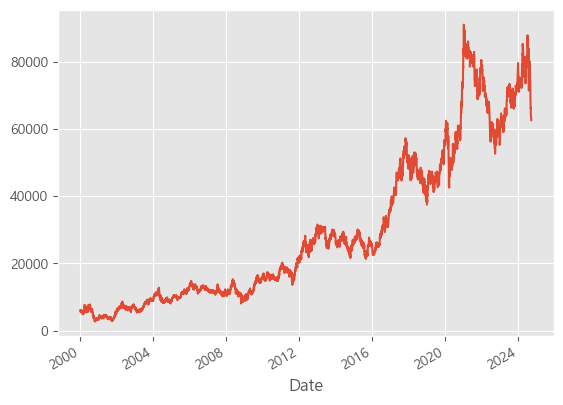

In [22]:
sdf['Close'].plot()

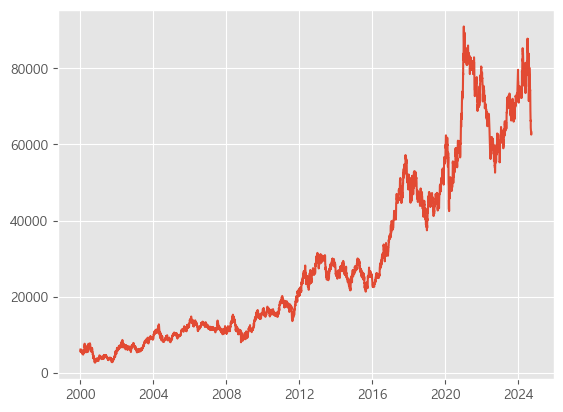

In [30]:
plt.plot(sdf['Close'])
plt.show()

## 이동 평균(Move Average)
- 기간별 추세 확인시 사용

In [40]:
data1 = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]
df = pd.DataFrame( data1, columns=['A', 'B'] )

df.index=['2023-01-01','2023-02-01','2023-03-01','2023-04-01',
          '2023-05-01','2023-06-01','2023-07-01','2023-08-01']
df

,A,B
2023-01-01,1,2
2023-02-01,3,4
2023-03-01,5,8
2023-04-01,7,6
2023-05-01,9,12
2023-06-01,11,10
2023-07-01,13,16
2023-08-01,15,20


In [42]:
#rolling 객체의 멤버함수 mean, sum, max, min
df.rolling(window=2).mean() 
# 1행값 nan, 2행값 = 2행 - 1행 ...

,A,B
2023-01-01,NaN,NaN
2023-02-01,2.0,3.0
2023-03-01,4.0,6.0
2023-04-01,6.0,7.0
2023-05-01,8.0,9.0
2023-06-01,10.0,11.0
2023-07-01,12.0,13.0
2023-08-01,14.0,18.0


In [44]:
df.rolling(window=3).mean()

,A,B
2023-01-01,NaN,NaN
2023-02-01,NaN,NaN
2023-03-01,3.0,4.666667
2023-04-01,5.0,6.000000
2023-05-01,7.0,8.666667
2023-06-01,9.0,9.333333
2023-07-01,11.0,12.666667
2023-08-01,13.0,15.333333


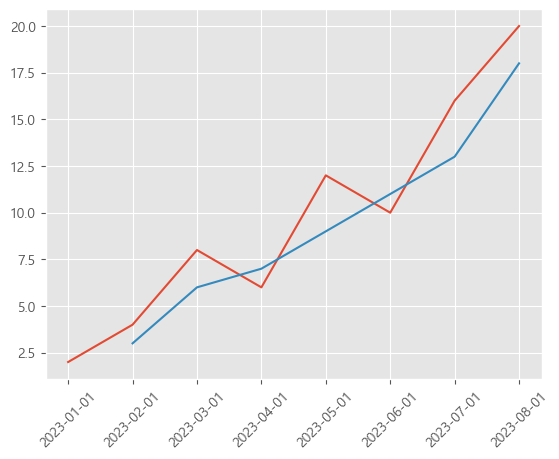

In [46]:
plt.xticks(rotation=45)
plt.plot(df.index, df['B'])
plt.plot(df.index, df['B'].rolling(window=2).mean())
plt.show()

In [48]:
sdf['Close'].rolling(window=120).mean()

Date
2000-01-04             NaN
2000-01-05             NaN
2000-01-06             NaN
2000-01-07             NaN
2000-01-10             NaN
                  ...     
2024-09-13    78810.833333
2024-09-19    78679.166667
2024-09-20    78552.500000
2024-09-23    78408.333333
2024-09-24    78270.000000
Name: Close, Length: 6196, dtype: float64

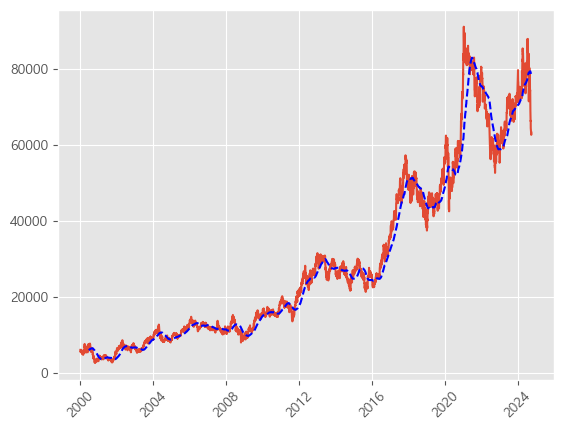

In [50]:
plt.xticks(rotation=45)
plt.plot(sdf.index, sdf['Close'])
plt.plot(sdf.index, sdf['Close'].rolling(window=120).mean(), 'b--')

## 시계열데이터 인덱싱 슬라이싱
- 인덱스가 datetime형일 경우, 인덱스로 슬라이싱이 가능하다(object는 불가)

In [52]:
sdf.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2024-09-06', '2024-09-09', '2024-09-10', '2024-09-11',
               '2024-09-12', '2024-09-13', '2024-09-19', '2024-09-20',
               '2024-09-23', '2024-09-24'],
              dtype='datetime64[ns]', name='Date', length=6196, freq=None)

In [54]:
# 2023년 조회하기 # sdf['2023'] 에러남, 칼럼 조회와 헷갈리니 가능하면 loc을 쓰자
sdf.loc['2023']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,55500.0,56100.0,55200.0,55500.0,53877.191406,10031448
2023-01-03,55400.0,56000.0,54500.0,55400.0,53780.113281,13547030
2023-01-04,55700.0,58000.0,55600.0,57800.0,56109.941406,20188071
2023-01-05,58200.0,58800.0,57600.0,58200.0,56498.242188,15682826
2023-01-06,58300.0,59400.0,57900.0,59000.0,57274.855469,17334989
...,...,...,...,...,...,...
2023-12-21,74600.0,75000.0,74300.0,75000.0,73978.890625,13478766
2023-12-22,75800.0,76300.0,75400.0,75900.0,74866.640625,14515608
2023-12-26,76100.0,76700.0,75700.0,76600.0,75557.109375,13164909


In [56]:
sdf.loc['2023-11']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,67500.0,68900.0,67300.0,68600.0,67666.023438,13775256
2023-11-02,70000.0,70000.0,69400.0,69700.0,68751.054688,16350031
2023-11-03,69700.0,70200.0,69500.0,69600.0,68652.414062,10322234
2023-11-06,69800.0,70900.0,69300.0,70900.0,69934.710938,22228489
2023-11-07,70600.0,70900.0,70000.0,70900.0,69934.710938,17228731
2023-11-08,71300.0,71400.0,69700.0,69900.0,68948.328125,12901310
2023-11-09,69900.0,70800.0,69600.0,70300.0,69342.882812,12301373
2023-11-10,70000.0,70500.0,69500.0,70500.0,69540.156250,9684347
2023-11-13,71300.0,71300.0,70300.0,70400.0,69441.515625,9246919


In [58]:
sdf.loc['2022':'2023']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,74562.312500,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,73330.656250,25470640
2022-01-06,76700.0,77600.0,76600.0,76900.0,72856.960938,12931954
2022-01-07,78100.0,78400.0,77400.0,78300.0,74183.343750,15163757
2022-01-10,78100.0,78100.0,77100.0,78000.0,73899.117188,9947422
...,...,...,...,...,...,...
2023-12-21,74600.0,75000.0,74300.0,75000.0,73978.890625,13478766
2023-12-22,75800.0,76300.0,75400.0,75900.0,74866.640625,14515608
2023-12-26,76100.0,76700.0,75700.0,76600.0,75557.109375,13164909


In [54]:
sdf.loc['2020-12-01':'2022-12-31']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,67100.0,68300.0,67100.0,67800.0,61534.566406,22327173
2020-12-02,68400.0,69900.0,68300.0,69500.0,63077.488281,29703942
2020-12-03,70100.0,70500.0,69300.0,69700.0,63258.988281,23677989
2020-12-04,70400.0,72100.0,70100.0,71500.0,64892.664062,28130533
2020-12-07,72400.0,73500.0,71900.0,72900.0,66163.289062,28490496
...,...,...,...,...,...,...
2022-12-23,58200.0,58400.0,57700.0,58100.0,56050.726562,9829407
2022-12-26,58000.0,58100.0,57700.0,57900.0,55857.773438,6756411
2022-12-27,58000.0,58400.0,57900.0,58100.0,56050.726562,10667027


In [60]:
sdf['year'] = sdf.index.year
sdf

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4429.952637,74195000,2000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4045.686279,74680000,2000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4074.685791,54390000,2000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4016.682373,40305000,2000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4183.440918,46880000,2000
...,...,...,...,...,...,...,...
2024-09-13,65000.0,65500.0,64300.0,64400.0,64400.000000,25045135,2024
2024-09-19,64000.0,64400.0,62200.0,63100.0,63100.000000,49402713,2024
2024-09-20,63800.0,64700.0,63000.0,63000.0,63000.000000,32746056,2024


## 시계열 데이터의 통계(집계)


In [62]:
# 년도별 평균(수치데이터 칼럼 전체 적용 ), 년도 칼럼 활용
round(sdf.groupby('year').mean()) # groupby객체 멤버함수 sum mean max min agg

,Open,High,Low,Close,Adj Close,Volume
year,,,,,,
2000,5370.0,5494.0,5248.0,5362.0,3887.0,50783205.0
2001,3989.0,4062.0,3928.0,3999.0,2899.0,33614195.0
2002,6850.0,6955.0,6752.0,6857.0,4971.0,39264176.0
2003,7461.0,7554.0,7372.0,7468.0,5415.0,29283123.0
2004,9675.0,9787.0,9557.0,9675.0,7014.0,27187061.0
2005,10723.0,10825.0,10632.0,10733.0,7782.0,20577988.0
2006,12768.0,12893.0,12638.0,12762.0,9258.0,19283371.0
2007,11556.0,11681.0,11418.0,11546.0,8453.0,27934642.0
2008,11486.0,11670.0,11315.0,11494.0,8533.0,27783142.0


In [64]:
# 인덱스의 연도만 추출해서 그루핑
round(sdf.groupby(sdf.index.year).mean())

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2000,5370.0,5494.0,5248.0,5362.0,3887.0,50783205.0,2000.0
2001,3989.0,4062.0,3928.0,3999.0,2899.0,33614195.0,2001.0
2002,6850.0,6955.0,6752.0,6857.0,4971.0,39264176.0,2002.0
2003,7461.0,7554.0,7372.0,7468.0,5415.0,29283123.0,2003.0
2004,9675.0,9787.0,9557.0,9675.0,7014.0,27187061.0,2004.0
2005,10723.0,10825.0,10632.0,10733.0,7782.0,20577988.0,2005.0
2006,12768.0,12893.0,12638.0,12762.0,9258.0,19283371.0,2006.0
2007,11556.0,11681.0,11418.0,11546.0,8453.0,27934642.0,2007.0
2008,11486.0,11670.0,11315.0,11494.0,8533.0,27783142.0,2008.0


In [66]:
# 연도 및 월별
sdf.groupby([sdf.index.year, sdf.index.month]).mean()

Open          High           Low         Close  \
Date Date                                                           
2000 1      5750.500000   5877.000000   5647.500000   5763.500000   
     2      5278.571429   5398.095238   5129.523810   5241.904762   
     3      6009.565217   6188.260870   5827.826087   5999.565217   
     4      6399.000000   6559.500000   6232.500000   6356.500000   
     5      6282.608696   6436.521739   6181.739130   6286.521739   
...                 ...           ...           ...           ...   
2024 5     78165.000000  78895.000000  77135.000000  77780.000000   
     6     78731.578947  79531.578947  78147.368421  78831.578947   
     7     84191.304348  85082.608696  83417.391304  84382.608696   
     8     77166.666667  77738.095238  75952.380952  76500.000000   
     9     67178.571429  67850.000000  66371.428571  66857.142857   

              Adj Close        Volume    year  
Date Date                                      
2000 1      4178.728271  4.512675e+07  2000.0  
     2      3800.554688  5.201405e+07  2000.0  
     3      4349.883290  5.558217e+07  2000.0  
     4      4608.672290  4.375625e+07  2000.0  
     5      4557.936035  4.119413e+07  2000.0  
...                 ...           ...     ...  
2024 5     77434.628516  2.105444e+07  2024.0  
     6     78519.655428  1.852085e+07  2024.0  
     7     84382.608696  2.074605e+07  2024.0  
     8     76500.000000  1.914334e+07  2024.0  
     9     66857.142857  2.608491e+07  2024.0  

[297 rows x 7 columns]

## resample : 시계열데이터 전용 집계함수
resample rule
http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [59]:
sdf.resample?

Signature:
sdf.resample(
    rule,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    closed: "Literal['right', 'left'] | None" = None,
    label: "Literal['right', 'left'] | None" = None,
    convention: "Literal['start', 'end', 's', 'e'] | lib.NoDefault" = <no_default>,
    kind: "Literal['timestamp', 'period'] | None | lib.NoDefault" = <no_default>,
    on: 'Level | None' = None,
    level: 'Level | None' = None,
    origin: 'str | TimestampConvertibleTypes' = 'start_day',
    offset: 'TimedeltaConvertibleTypes | None' = None,
    group_keys: 'bool_t' = False,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time series.
The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
series/index to the ``on``/``level`` keyword parameter.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or object

In [68]:
# DatetimeIndexResample : sum, mean, max, min
sdf.resample(rule='Y').mean()

C:\Users\82109\AppData\Local\Temp\ipykernel_15020\3838030928.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sdf.resample(rule='Y').mean()


,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2000-12-31,5370.115830,5493.513514,5248.108108,5361.583012,3887.324936,5.078320e+07,2000.0
2001-12-31,3989.233716,4061.570881,3928.352490,3998.735632,2899.215479,3.361420e+07,2001.0
2002-12-31,6850.344828,6955.172414,6752.183908,6856.896552,4971.476505,3.926418e+07,2002.0
2003-12-31,7460.689655,7554.022989,7371.609195,7468.237548,5414.719057,2.928312e+07,2003.0
2004-12-31,9675.000000,9787.251908,9556.946565,9674.694656,7014.473707,2.718706e+07,2004.0
2005-12-31,10722.934363,10825.366795,10631.814672,10733.359073,7782.040229,2.057799e+07,2005.0
2006-12-31,12768.467742,12892.822581,12637.580645,12762.419355,9257.736744,1.928337e+07,2006.0
2007-12-31,11555.609756,11681.463415,11418.455285,11546.422764,8452.882765,2.793464e+07,2007.0
2008-12-31,11485.758755,11669.883268,11314.747082,11494.435798,8532.523890,2.778314e+07,2008.0


In [61]:
sdf.resample(rule='Q').mean()

C:\Users\com\AppData\Local\Temp\ipykernel_7476\2730275628.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sdf.resample(rule='Q').mean()


,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2000-03-31,5688.750000,5831.718750,5542.343750,5677.187500,4116.148441,5.114406e+07,2000.0
2000-06-30,6562.769231,6726.000000,6422.923077,6553.384615,4751.420361,4.471792e+07,2000.0
2000-09-30,5934.000000,6033.692308,5807.692308,5910.923077,4285.614487,4.556308e+07,2000.0
2000-12-31,3299.846154,3387.846154,3224.000000,3309.692308,2399.636296,6.171331e+07,2000.0
2001-03-31,3975.538462,4055.538462,3912.615385,3990.000000,2892.881945,3.713292e+07,2001.0
...,...,...,...,...,...,...,...
2023-09-30,69772.580645,70319.354839,69156.451613,69687.096774,68392.100050,1.363359e+07,2023.0
2023-12-31,71020.000000,71543.333333,70531.666667,71061.666667,70106.361133,1.364019e+07,2023.0
2024-03-31,74711.475410,75319.672131,74001.639344,74645.901639,73990.310835,1.860166e+07,2024.0


In [62]:
sdf.resample(rule='M').mean()

C:\Users\com\AppData\Local\Temp\ipykernel_7476\2935727486.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sdf.resample(rule='M').mean()


,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2000-01-31,5750.500000,5877.000000,5647.500000,5763.500000,4178.727515,4.512675e+07,2000.0
2000-02-29,5278.571429,5398.095238,5129.523810,5241.904762,3800.554385,5.201405e+07,2000.0
2000-03-31,6009.565217,6188.260870,5827.826087,5999.565217,4349.882950,5.558217e+07,2000.0
2000-04-30,6399.000000,6559.500000,6232.500000,6356.500000,4608.672473,4.375625e+07,2000.0
2000-05-31,6282.608696,6436.521739,6181.739130,6286.521739,4557.935802,4.119413e+07,2000.0
...,...,...,...,...,...,...,...
2024-05-31,78165.000000,78895.000000,77135.000000,77780.000000,77434.628516,2.105444e+07,2024.0
2024-06-30,78731.578947,79531.578947,78147.368421,78831.578947,78519.655428,1.852085e+07,2024.0
2024-07-31,84191.304348,85082.608696,83417.391304,84382.608696,84382.608696,2.074605e+07,2024.0


In [63]:
# 주별, default 월-일, 요일구간을 정할 수 있다
sdf.resample(rule='W').mean()

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2000-01-09,5777.5,5905.0,5530.0,5712.5,4141.750977,60892500.0,2000.0
2000-01-16,5670.0,5846.0,5638.0,5760.0,4176.189844,45282000.0,2000.0
2000-01-23,5994.0,6080.0,5912.0,6016.0,4361.798145,43764000.0,2000.0
2000-01-30,5588.0,5712.0,5504.0,5592.0,4054.384424,34821000.0,2000.0
2000-02-06,5368.0,5474.0,5206.0,5282.0,3829.624609,63594000.0,2000.0
...,...,...,...,...,...,...,...
2024-09-01,75520.0,76160.0,74920.0,75320.0,75320.000000,13964719.2,2024.0
2024-09-08,71520.0,72200.0,70560.0,70960.0,70960.000000,20206321.2,2024.0
2024-09-15,66000.0,66620.0,65260.0,65860.0,65860.000000,30130724.4,2024.0


In [64]:
sdf.resample(rule='D').mean()

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4429.951172,74195000.0,2000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4045.684326,74680000.0,2000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4074.685059,54390000.0,2000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4016.683350,40305000.0,2000.0
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-09-19,64000.0,64400.0,62200.0,63100.0,63100.000000,49402713.0,2024.0
2024-09-20,63800.0,64700.0,63000.0,63000.0,63000.000000,32746056.0,2024.0
2024-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
sdf.loc['2023-12'].resample(rule='H').mean()

C:\Users\com\AppData\Local\Temp\ipykernel_7476\2927331322.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sdf.loc['2023-12'].resample(rule='H').mean()


,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2023-12-01 00:00:00,72400.0,72500.0,71700.0,72000.0,71019.742188,9871284.0,2023.0
2023-12-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-27 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-27 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-27 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
sdf.loc['2023-12'].resample(rule='T').mean()

C:\Users\com\AppData\Local\Temp\ipykernel_7476\3621469457.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  sdf.loc['2023-12'].resample(rule='T').mean()


,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2023-12-01 00:00:00,72400.0,72500.0,71700.0,72000.0,71019.742188,9871284.0,2023.0
2023-12-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-27 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-27 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-27 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
sdf.loc['2023-12'].resample(rule='S').mean()

C:\Users\com\AppData\Local\Temp\ipykernel_7476\3058733473.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  sdf.loc['2023-12'].resample(rule='S').mean()


,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2023-12-01 00:00:00,72400.0,72500.0,71700.0,72000.0,71019.742188,9871284.0,2023.0
2023-12-01 00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 00:00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 00:00:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-27 23:59:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-27 23:59:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-27 23:59:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 연습문제 : 교통사고 데이터 분석
1. data폴더의 2014년~2016년 졸음운전 교통사고 데이터 3개를 병합하시오.   

====이후문제는 병합한 데이터프레임을 이용 ===========

2. 인덱스를 datetime 으로 만드시오.   

3. 년도 및 월별, 분기별, 평균 사망자를 보여주시오.   

4.  2016년 사고대비 사망율을 구하시오.   

5. 2014년도 월별 사망, 부상 데이터를 그래프로 보여주시오.   

6. 2015년 대비  사망이 가장 많이 증가한 2016년 도 월을 구하시오.   

In [74]:
import pandas as pd

In [86]:
# 1. 3개 데이터 병합
data_2014 = pd.read_csv('C:/Users/82109/Desktop/WASSUP AI기획/맹광국/샘플데이터/data/2014년 졸음운전 교통사고.csv', encoding='ANSI', index_col='구분')
data_2015 = pd.read_csv('C:/Users/82109/Desktop/WASSUP AI기획/맹광국/샘플데이터/data/2015년 졸음운전 교통사고.csv', encoding='ANSI', index_col='구분')
data_2016 = pd.read_csv('C:/Users/82109/Desktop/WASSUP AI기획/맹광국/샘플데이터/data/2016년 졸음운전 교통사고.csv', encoding='ANSI', index_col='구분')
data_2014.head()

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474


In [88]:
data_2014.info(), data_2015.info(), data_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2014년1월 to 2014년12월
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사고(건)   12 non-null     int64
 1   사망(명)   12 non-null     int64
 2   부상(명)   12 non-null     int64
dtypes: int64(3)
memory usage: 384.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2015년1월 to 2015년12월
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사고(건)   12 non-null     int64
 1   사망(명)   12 non-null     int64
 2   부상(명)   12 non-null     int64
dtypes: int64(3)
memory usage: 384.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2016년1월 to 2016년12월
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사고(건)   12 non-null     int64
 1   사망(명)   12 non-null     int64
 2   부상(명)   12 non-null     int64
dtypes: int64(3)
memory usage: 384.0+ bytes


(None, None, None)

In [96]:
data_total = pd.concat([data_2014, data_2015, data_2016], axis=0)
data_total

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


In [98]:
# 2. 인덱스를 datetime 으로 만드시요
data_total.index

Index(['2014년1월', '2014년2월', '2014년3월', '2014년4월', '2014년5월', '2014년6월',
       '2014년7월', '2014년8월', '2014년9월', '2014년10월', '2014년11월', '2014년12월',
       '2015년1월', '2015년2월', '2015년3월', '2015년4월', '2015년5월', '2015년6월',
       '2015년7월', '2015년8월', '2015년9월', '2015년10월', '2015년11월', '2015년12월',
       '2016년1월', '2016년2월', '2016년3월', '2016년4월', '2016년5월', '2016년6월',
       '2016년7월', '2016년8월', '2016년9월', '2016년10월', '2016년11월', '2016년12월'],
      dtype='object', name='구분')

In [104]:
data_total.index  = pd.to_datetime(data_total.index,format= '%Y년%m월')
data_total.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='구분', freq=None)

In [73]:
# 3. 년도 및 월별, 분기별 평균 사망자를 보여주시요
data_total[['사망(명)']].groupby([data_total.index.quarter, data_total.index.year, data_total.index.month]).mean()

사망(명)
구분 구분   구분       
1  2014 1     7.0
        2     3.0
        3    12.0
   2015 1     8.0
        2     8.0
        3     4.0
   2016 1     5.0
        2     6.0
        3     7.0
2  2014 4     4.0
        5    17.0
        6    13.0
   2015 4    10.0
        5     9.0
        6     8.0
   2016 4     7.0
        5    13.0
        6    12.0
3  2014 7    14.0
        8     9.0
        9    15.0
   2015 7     7.0
        8    19.0
        9    10.0
   2016 7     9.0
        8     7.0
        9    13.0
4  2014 10   14.0
        11   10.0
        12   12.0
   2015 10   14.0
        11    3.0
        12    8.0
   2016 10   10.0
        11    5.0
        12    4.0

In [112]:
data_total[['사망(명)']].resample(rule='QE').mean()

,사망(명)
구분,
2014-03-31,7.333333
2014-06-30,11.333333
2014-09-30,12.666667
2014-12-31,12.000000
2015-03-31,6.666667
2015-06-30,9.000000
2015-09-30,12.000000
2015-12-31,8.333333
2016-03-31,6.000000


In [114]:
# 4.  2016년 사고대비 사망율을 구하시요
data_total.loc['2016']['사망(명)']/ data_total.loc['2016']['사고(건)']

구분
2016-01-01    0.026042
2016-02-01    0.034483
2016-03-01    0.032258
2016-04-01    0.032407
2016-05-01    0.054393
2016-06-01    0.060000
2016-07-01    0.039648
2016-08-01    0.030435
2016-09-01    0.069519
2016-10-01    0.054645
2016-11-01    0.025000
2016-12-01    0.023810
dtype: float64

In [116]:
round ( data_total.loc['2016']['사망(명)'].sum()/ data_total.loc['2016']['사고(건)'].sum(), 2 )

0.04

In [77]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm
#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='구분'>

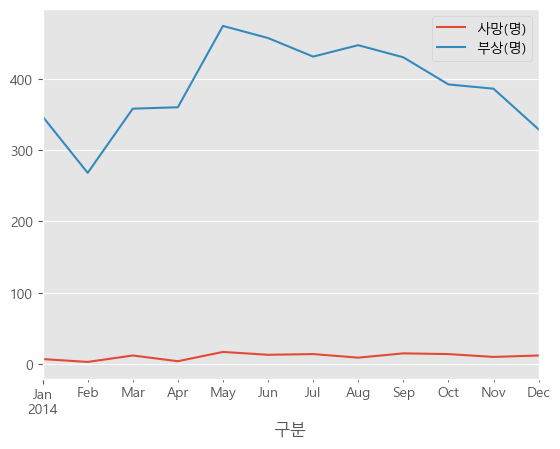

In [118]:
# 5. 2014년도 월별 사망, 부상 데이터를 그래프로 보여주시요
data_total.loc['2014'][['사망(명)','부상(명)']].plot()

<Axes: xlabel='구분'>

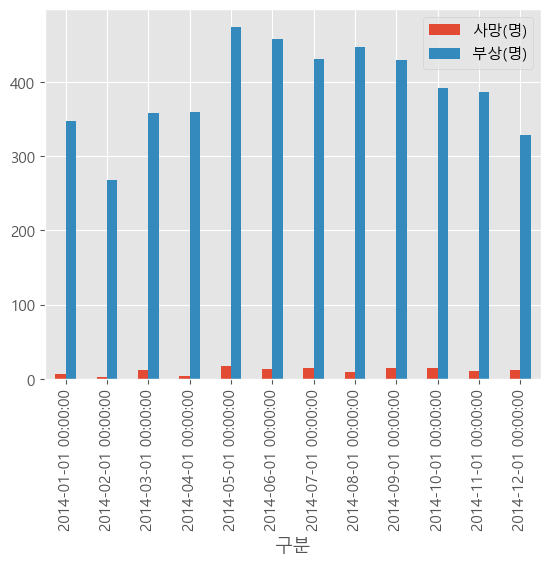

In [79]:
# 5. 2014년도 월별 사망, 부상 데이터를 그래프로 보여주시요
data_total.loc['2014'][['사망(명)','부상(명)']].plot(kind='bar') # 보기 힘들다 이중축으로 만들어 보면어떨까?  바+꺾은선
# plt.xticks(rotation=45)
# plt.plot(temp_2014.index, temp_2014)

In [80]:
data_total.loc['2016']

,사고(건),사망(명),부상(명)
구분,,,
2016-01-01,192,5,387
2016-02-01,174,6,328
2016-03-01,217,7,435
2016-04-01,216,7,419
2016-05-01,239,13,522
2016-06-01,200,12,362
2016-07-01,227,9,460
2016-08-01,230,7,490
2016-09-01,187,13,347


In [81]:
data_total.loc['2016', '사망(명)'].values

array([ 5,  6,  7,  7, 13, 12,  9,  7, 13, 10,  5,  4], dtype=int64)

In [82]:
(data_total.loc['2016', '사망(명)'].values
 - data_total.loc['2015', '사망(명)'].values)

array([ -3,  -2,   3,  -3,   4,   4,   2, -12,   3,  -4,   2,  -4],
      dtype=int64)

In [83]:
# 6. 2015년 대비  사망이 가장 많이 증가한 2016년 도 월을 구하시요
(data_total.loc['2016', '사망(명)'].values
 - data_total.loc['2015', '사망(명)'].values).argmax() # argmax가장 높은 값의 인덱스를 반환
# 과연 맞을까?

4

In [84]:
result = (data_total.loc['2016', '사망(명)'].values 
                     - data_total.loc['2015', '사망(명)'].values)
result

array([ -3,  -2,   3,  -3,   4,   4,   2, -12,   3,  -4,   2,  -4],
      dtype=int64)

In [85]:
sr = pd.Series( result, index= range(1,13))
sr

1     -3
2     -2
3      3
4     -3
5      4
6      4
7      2
8    -12
9      3
10    -4
11     2
12    -4
dtype: int64

In [86]:
sr.nlargest?

Signature:
sr.nlargest(
    n: 'int' = 5,
    keep: "Literal['first', 'last', 'all']" = 'first',
) -> 'Series'
Docstring:
Return the largest `n` elements.

Parameters
----------
n : int, default 5
    Return this many descending sorted values.
keep : {'first', 'last', 'all'}, default 'first'
    When there are duplicate values that cannot all fit in a
    Series of `n` elements:

    - ``first`` : return the first `n` occurrences in order
      of appearance.
    - ``last`` : return the last `n` occurrences in reverse
      order of appearance.
    - ``all`` : keep all occurrences. This can result in a Series of
      size larger than `n`.

Returns
-------
Series
    The `n` largest values in the Series, sorted in decreasing order.

See Also
--------
Series.nsmallest: Get the `n` smallest elements.
Series.sort_values: Sort Series by values.
Series.head: Return the first `n` rows.

Notes
-----
Faster than ``.sort_values(ascending=False).head(n)`` for small `n`
relative to the size of th

In [87]:
sr.nlargest( 1, keep='all') # 상위 n개의 값을  반환,  keep (first 동등하면 첫번째것, all은 전체, )
# 5월과 6월이 해당함

5    4
6    4
dtype: int64